# Introduction

DoWhy is based on a simple unifying language for causal inference, unifying two powerful frameworks, namely graphical causal models (GCM) and potential outcomes (PO). It uses graph-based criteria and do-calculus for modeling assumptions and identifying a non-parametric causal effect.

## 1. Effect Inference

For effect estimation, DoWhy switches to methods based primarily on **potential outcomes**. To do it, DoWhy offers a simple 4-step recipe consisting of modeling a causal model, identification, estimation, and refutation


In summary:

1. Model → Encode causal assumptions (graph).

2. Identify causal effect (backdoor etc) → Use rules of causal inference to see if effect is identifiable.

3. Estimate causal effect → Apply statistical/ML methods to compute effect.

4. Refute → Test robustness of your results.

In [1]:
from dowhy import CausalModel
import dowhy.datasets
import networkx as nx
import matplotlib.pyplot as plt

### Step 0: Getting data and visualizing it

In [2]:
## Getting the dataset
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000)

In [3]:
data

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0     0.0  0.427193 -0.260021 -0.563196 -1.033391 -2.007088  0.936749  False   
 1     0.0  0.666177 -1.184803 -2.783150 -0.150859  0.549884  1.088594  False   
 2     0.0  0.573523 -0.074038 -0.514493 -1.515047 -0.409164 -1.749077   True   
 3     0.0  0.076315 -1.138810 -1.831654  0.164791 -0.320831 -0.203628  False   
 4     0.0  0.834966  0.086365 -1.511103  0.150679  1.855018 -0.953385   True   
 ...   ...       ...       ...       ...       ...       ...       ...    ...   
 9995  1.0  0.002984 -0.480434  0.091592 -1.283931  0.431891 -0.170412   True   
 9996  1.0  0.032531 -1.269147  0.181072 -2.413145  1.023586  3.004275   True   
 9997  0.0  0.271890  0.134730  1.113464 -0.869367 -1.253910  0.958049   True   
 9998  0.0  0.480696 -2.296898 -1.419945 -2.190885 -0.986909 -0.850250   True   
 9999  0.0  0.239581 -0.734930 -1.149465  1.265664  1.035662  1.647402   True   
 
               y  
 

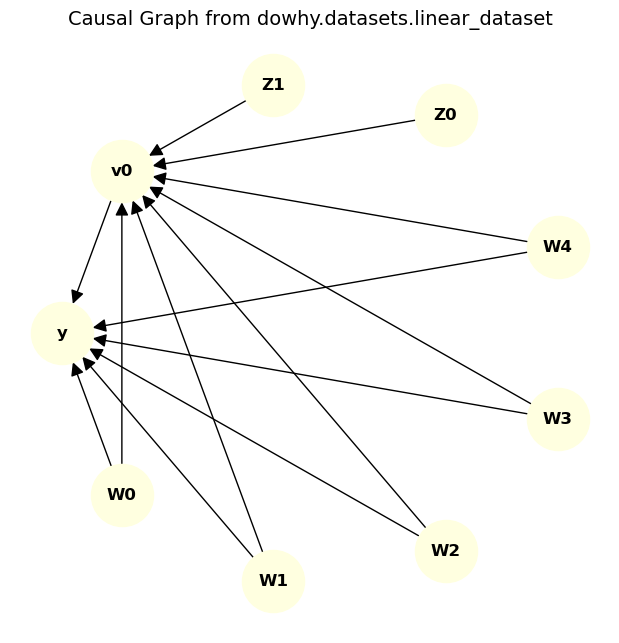

In [11]:
# The dataset object has a GML string for the causal DAG
gml_str = data["gml_graph"]

# Build the graph using networkx
G = nx.parse_gml(gml_str)

# Plot
plt.figure(figsize=(6,6))
pos = nx.shell_layout(G)   # you can change to shell_layout / kamada_kawai_layout
nx.draw(
    G, pos,
    with_labels=True,
    node_size=2000,
    node_color="lightyellow",
    font_size=12,
    font_weight="bold",
    arrows=True,
    arrowsize=20
)
plt.title("Causal Graph from dowhy.datasets.linear_dataset", fontsize=14)
plt.show()

### Step 1: Create a causal model from the data and given graph.

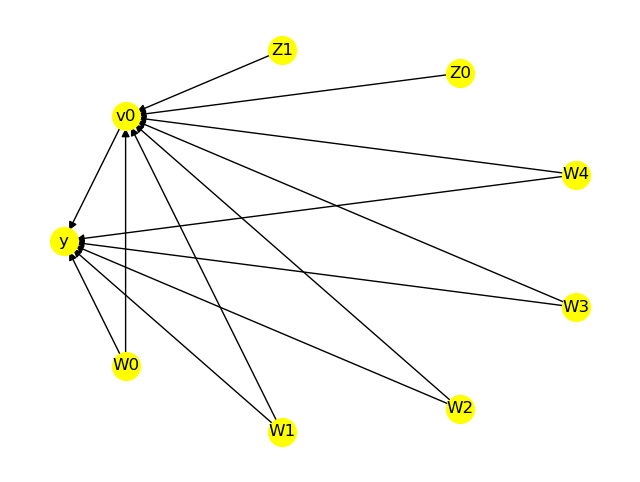

In [ ]:
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

model.view_model()  
## This is using given graph information and not learning from data, we assume we have the correct graph

### Step 2: Identify causal effect and return target estimands

In [14]:

identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W3,W1,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W3,W1,W2,U) = P(y|v0,W0,W4,W3,W1,W2)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Step 3: Estimate the target estimand using a statistical method.

In [18]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")
estimate

propensity_score_matching


/home/prashant/anaconda3/envs/pytorch_2025/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
estimate.value

### Step 4: Refute the obtained estimate using multiple robustness checks.

In [25]:
import warnings
warnings.filterwarnings("ignore")
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

In [26]:
print(refute_results)

Refute: Add a random common cause
Estimated effect:9.70122390028578
New effect:9.723071337561745
p value:0.88



# 2. Graphical causal model-based inference

For features like:
1. root cause analysis

2. point-wise counterfactual inference

3. structural analysis and similar,

DoWhy uses graphical causal models. The language of graphical causal models again offers a variety of causal questions that can be answered. DoWhy’s API to answer these causal questions follows a simple 3-step recipe as follows:

In [7]:
import networkx as nx
import numpy as np
import pandas as pd
#import pywhy_graphs  # (internal dependency, auto-installed)
from dowhy import gcm   # now works if the gcm extra is installed

ModuleNotFoundError: No module named 'numpy.dual'

ModuleNotFoundError: No module named 'numpy.dual'